In [ ]:
library(genlasso)
library(glmnet)

In [1]:
install.packages("genlasso", repos='http://cran.us.r-project.org')


The downloaded binary packages are in
	/var/folders/61/b1jt70gj7gv729b3g93wmkkr0000gp/T//RtmpBX20KV/downloaded_packages


In [3]:

set.seed(1)
n = 100
p = 10
X = matrix(rnorm(n*p),nrow=n)
y = 3*X[,1] + rnorm(n)
D = diag(1,p)
out = genlasso(y,X,D)
coef(out, lambda=sqrt(n*log(p)))

15.174
2.656231
1.811714e-16
-1.126276e-17
-2.906445e-16
3.957981e-16
-9.506691e-17
-7.429587e-17
-3.868683e-17
-8.43664e-17
2.438849e-16


# Synthetic Data

In [8]:
n_genes <- 180
n_signal <- 3
n_samples <- 100

In [9]:
beta <- rep(0,n_genes)
beta[1:n_signal] <- 10*c(1:n_signal)

X <- array(rnorm(n_genes*n_samples), c(n_samples,n_genes))

y <- X %*% beta + 0.25*rnorm(n_samples)

In [10]:
fit <- glmnet(X,y)
plot(fit)

ERROR: Error in loadNamespace(name): there is no package called ‘Cairo’


ERROR: Error in loadNamespace(name): there is no package called ‘Cairo’


plot without title

In [410]:
cos(pi)

[1] -1

# synthetic time series data

In [360]:
n_genes <- 18
n_signal <- 3
n_timepoints <- 12
n_classes <- 1
n_samples_per_timepoint <- 10

In [411]:
beta <- rep(0,n_genes)
beta[1:3] <- 10*c(1:n_signal)
beta <- rep(beta,n_timepoints)
# beta[beta != 0] <- beta[beta != 0] + rnorm(length(beta[beta != 0]),mean = 1,sd = 0.25)
beta <- matrix(beta,ncol = 1)
beta_mat <- array(beta,c(n_genes,n_timepoints))

str(beta)
str(beta_mat)

 num [1:216, 1] 10 20 30 0 0 0 0 0 0 0 ...
 num [1:18, 1:12] 10 20 30 0 0 0 0 0 0 0 ...


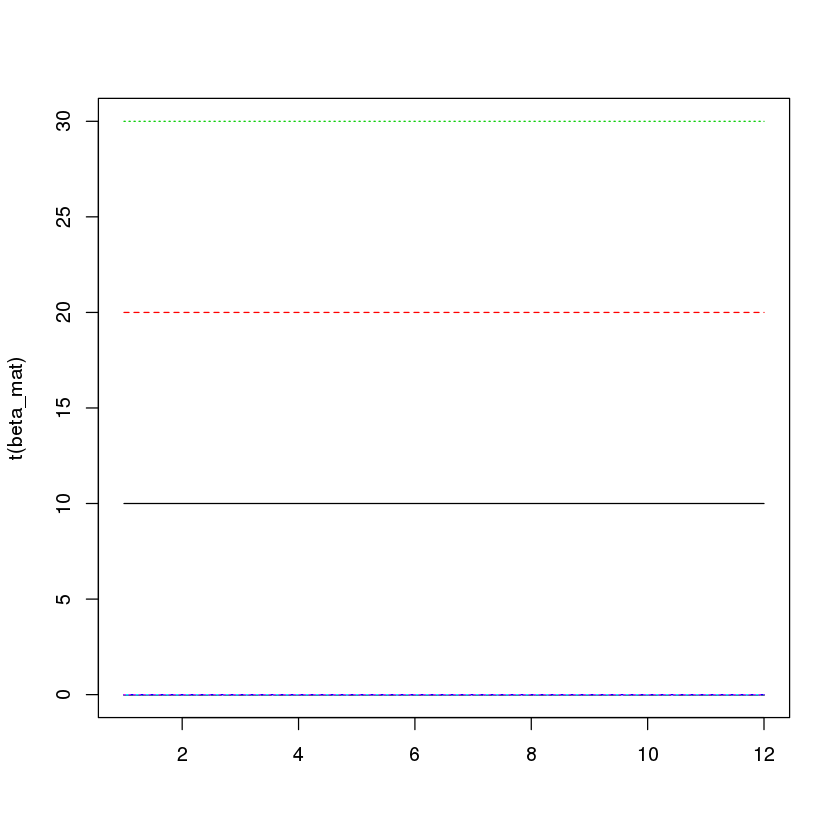

In [412]:
matplot(t(beta_mat), type = 'l')

In [414]:
X_all_t <- array(rnorm(n_genes*n_timepoints*n_samples_per_timepoint),
                 c(n_samples_per_timepoint,n_genes,n_timepoints))
str(X_all_t)

X <- matrix(X_all_t, nrow = n_samples_per_timepoint)
str(X)

y <- X %*% beta + 0.25*rnorm(n_samples_per_timepoint)

str(y)

 num [1:10, 1:18, 1:12] 0.0712 0.1391 -0.291 1.059 1.8752 ...
 num [1:10, 1:216] 0.0712 0.1391 -0.291 1.059 1.8752 ...
 num [1:10, 1] 59 -103.1 -225.6 -116.2 22.9 ...


In [424]:
X_concat <- matrix(X_all_t, nrow = n_samples_per_timepoint*n_timepoints)

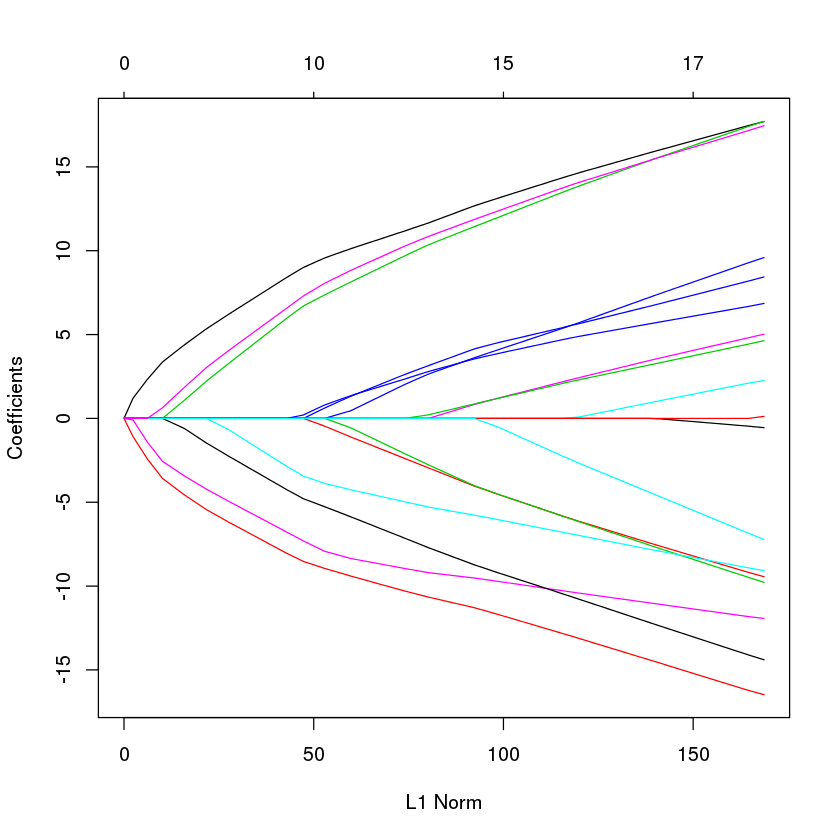

In [431]:
t <- 5
Xt <- X_all_t[,,t]
# yt <- y_all_t[,t]

fit <- glmnet(X_concat,rep(y,n_timepoints), alpha = 1)
plot(fit)

In [432]:
fit$beta

   [[ suppressing 62 column names ‘s0’, ‘s1’, ‘s2’ ... ]]
   [[ suppressing 62 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


18 x 62 sparse Matrix of class "dgCMatrix"
                                                                               
V1  .  1.20387110  2.335125  3.3613932  4.385584  5.337071  6.2130627  7.013681
V2  . -1.08528296 -2.428739 -3.5766102 -4.562769 -5.433693 -6.1889153 -6.866240
V3  .  .           .         .          1.080834  2.215951  3.2831291  4.265258
V4  .  .           .         .          .         .         .          .       
V5  .  .           .         .          .         .         .          .       
V6  . -0.09198934 -1.420332 -2.5599955 -3.431685 -4.215670 -4.9457706 -5.615021
V7  .  .           .         .          .         .         .          .       
V8  .  .           .         .          .         .         .          .       
V9  .  .           .         .          .         .         .          .       
V10 .  .           .         .          .         .         .          .       
V11 .  .           .         .          .         .        -0.6724611 -1.4704

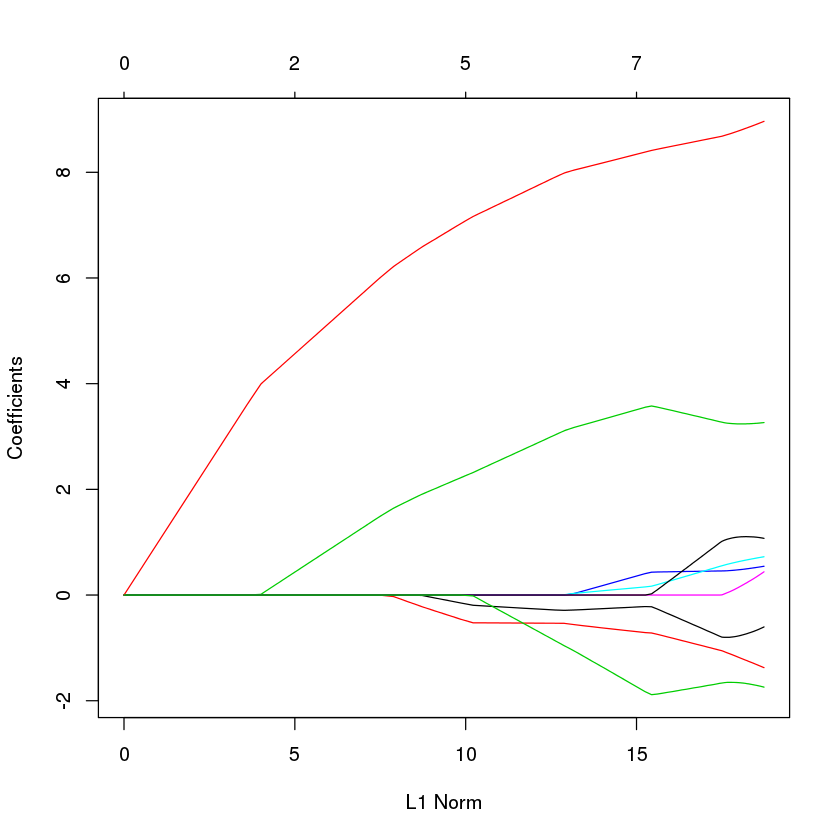

In [332]:
fit <- glmnet(X,y)
plot(fit)

In [333]:
getD1dSparse(5)

4 x 5 sparse Matrix of class "dgCMatrix"
                  
[1,] -1  1  .  . .
[2,]  . -1  1  . .
[3,]  .  . -1  1 .
[4,]  .  .  . -1 1

In [334]:
str(X)
str(y)

 num [1:10, 1:96] -0.904 -0.39 0.814 -0.564 -1.874 ...
 num [1:10, 1] 15.88 9.78 -10.26 2.12 -2.93 ...


In [335]:
D <- rep(0,length(beta_all_t)*(length(beta_all_t)-n_genes))
D <- matrix(D,ncol = length(beta_all_t))

for (i in 1:dim(D)[1]){
    D[i,i] <- 1
    D[i,i+n_genes] <- -1
}

str(D)
str(D %*% beta_all_t)

 num [1:88, 1:96] 1 0 0 0 0 0 0 0 0 0 ...
 num [1:88, 1] -0.1179 0.5272 -0.0855 0 0 ...


In [357]:
str(X)

 num [1:10, 1:96] 0.762 0.697 -1.05 -1.484 -0.027 ...


In [340]:
fit.genlasso = fusedlasso(y,X,D, gamma = 5)

Warning message:
In fusedlasso(y, X, D, gamma = 5): Adding a small ridge penalty (multiplier 0.0001), because X has more columns than rows.

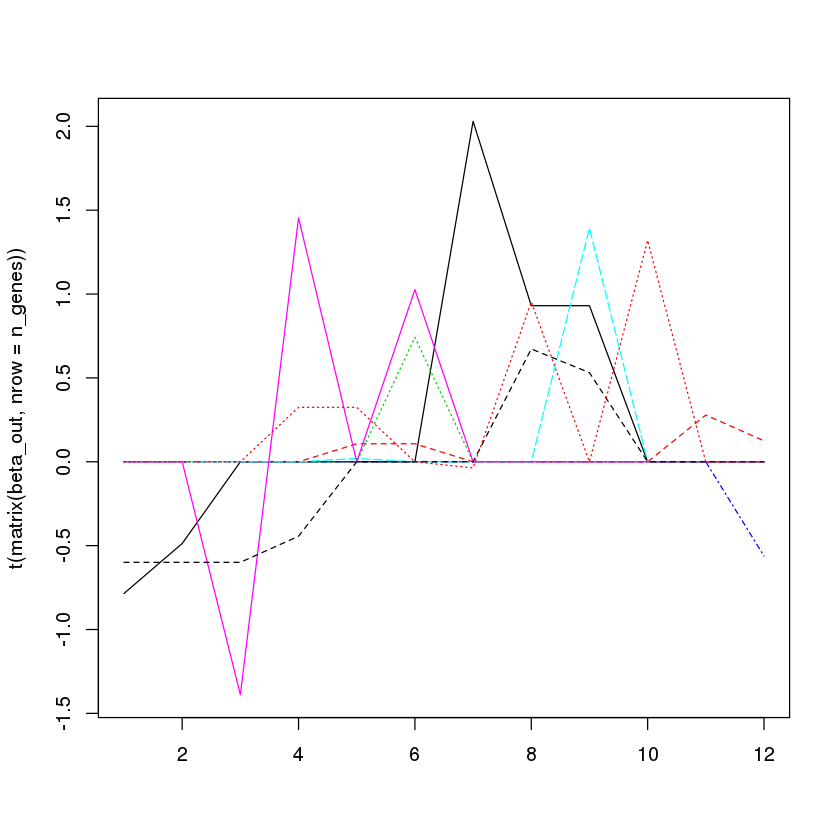

In [344]:
coefs <- coef(fit.genlasso)
beta_out <- ((coefs$beta)[,80])
matplot(t(matrix(beta_out,nrow = n_genes)), type='l')

# dense htg data

In [1]:
# expression data
load(file = "/proj/price1/sament/hdlux/hdlux.full.ComBat_corrected_expr.RData")

# column metadata
load(file = "/proj/price1/sament/hdlux/metadata.full.RData")

# probe annotation
anno = read.delim("/proj/price1/sament/hdlux/HDLux_agilent_gene_list-2.txt")
matchProbes = match( rownames(ComBatExpr) , anno$ProbeID )
anno = anno[ matchProbes , ]

In [2]:
ls()

[1] "anno"        "ComBatExpr"  "matchProbes" "q"           "quit"       
[6] "traitData"

In [3]:
list.files()

[1] "allen_brain"                                         
 [2] "allen_brain_backup"                                  
 [3] "anaconda3"                                           
 [4] "bdqc_sandbox"                                        
 [5] "bin"                                                 
 [6] "cmake-3.6.0"                                         
 [7] "dircolors-solarized"                                 
 [8] "doc"                                                 
 [9] "git-repos"                                           
[10] "include"                                             
[11] "julia"                                               
[12] "julia-dev"                                           
[13] "lib"                                                 
[14] "minibatch_algorithm.png"                             
[15] "R"                                                   
[16] "rik_kernel-7f103dad-e5e0-4cc1-8a92-44af8b3fc3fb.json"
[17] "seaborn-data"                                        
[18] "share"                                               
[19] "shared_data"                                         
[20] "TReNA"                                               
[21] "xgboost"

In [4]:
str(ComBatExpr)

 num [1:55821, 1:791] 18.19 6 5.92 6.79 8.58 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:55821] "(+)E1A_r60_1" "(+)E1A_r60_3" "(+)E1A_r60_a104" "(+)E1A_r60_a107" ...
  ..$ : chr [1:791] "hyb0007" "hyb0026" "hyb0052" "hyb0068" ...


In [5]:
str(anno)

'data.frame':	55821 obs. of  6 variables:
 $ ProbeID    : Factor w/ 55681 levels "A_30_P01017425",..: NA NA NA NA NA NA NA NA NA NA ...
 $ TargetID   : Factor w/ 35044 levels "","AA142423",..: NA NA NA NA NA NA NA NA NA NA ...
 $ GeneSymbol : Factor w/ 24155 levels "","0610005C13Rik",..: NA NA NA NA NA NA NA NA NA NA ...
 $ GeneName   : Factor w/ 24110 levels "","1-acylglycerol-3-phosphate O-acyltransferase 1 (lysophosphatidic acid acyltransferase, alpha)",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Accessions : Factor w/ 40345 levels "","BRN1-A","chr1:100481057-100494471_F",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Description: Factor w/ 34064 levels "0610238A amylase. {Rattus norvegicus} (exp=-1; wgp=0; cg=0), partial (11%) [TC1733495]",..: NA NA NA NA NA NA NA NA NA NA ...


In [6]:
str(matchProbes)

 int [1:55821] NA NA NA NA NA NA NA NA NA NA ...


In [7]:
str(traitData)

'data.frame':	791 obs. of  19 variables:
 $ hyb_id        : chr  "hyb0007" "hyb0026" "hyb0052" "hyb0068" ...
 $ sample_id     : chr  "121105AG94" "121121AG103" "121022AG103" "121228AG31" ...
 $ mouse_id      : chr  "hd1705" "hd1937" "hd1831" "hd1585" ...
 $ strain        : chr  "B6" "B6" "B6" "B6" ...
 $ allele_nominal: chr  "WT" "WT" "WT" "Q50" ...
 $ allele_actual : chr  "WT" "WT" "WT" "Q48" ...
 $ sex           : chr  "F" "M" "F" "M" ...
 $ week          : int  13 14 10 20 13 14 8 14 5 9 ...
 $ age           : num  13 14.3 10 20 13 ...
 $ date_harvest  : chr  "2012-11-05" "2012-11-21" "2012-10-22" "2012-12-28" ...
 $ time_harvest  : chr  "15:10:00" "12:00:00" "15:50:00" "10:45:00" ...
 $ date_hyb      : chr  "2013-06-14" "2013-09-18" "2013-08-13" "2013-06-28" ...
 $ slide_id      : chr  "252800515713" "252800517284" "252800517251" "252800515710" ...
 $ array_number  : int  5 5 8 2 4 8 3 6 6 4 ...
 $ array_coords  : chr  "2_2" "2_2" "1_1" "1_4" ...
 $ setaside      : int  0 0 0 0 0 0

In [13]:
library(limma)

#preliminaries
#set working directory
setwd("/proj/price1/sament/hdlux")
options(stringsAsFactors=F)
#load libraries needed in this analysis
library(limma)

#expression data
load("hdlux.full.ComBat_corrected_expr.RData")

#column metadata
load("metadata.full.RData")

#probe annotation
anno = read.delim("/proj/price1/sament/hdlux/HDLux_agilent_gene_list-2.txt")
matchProbes = match( rownames(ComBatExpr) , anno$ProbeID )
anno = anno[ matchProbes , ]

#which samples go into the current analysis?
useSamples = which(traitData$allele_nominal %in% c("Q111" , "WT") )

expr = ComBatExpr
meta = traitData
attach( meta )
table( allele_nominal , week , sex )

, , sex = F

              week
allele_nominal  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
          Q111 14  5  7  5 13  5  8  4 11  7  4  4 13  5  5  6 16
          Q50   8  2  4  3  7  0  2  0 10  4  3  5 10  0  1  1 10
          Q92   1  1  1  0  2  0  1  2  2  1  2  3  2  3  1  3  0
          WT    9  7 10  8  8  6 11  9 10 12 10 12 10  8  8 13 13

, , sex = M

              week
allele_nominal  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
          Q111 12  7  6  7 13  7  4  8 14  4  7  7 13  7  7  5 10
          Q50  12  3  1  2  7  3  2  3  9  1  2  0  9  5  4  4  9
          Q92   2  2  2  3  1  3  1  1  1  2  0  0  1  0  3  0  3
          WT    7 10  6  8 11 13  8 12 10  8 10  8 10 13 12  8  7


In [14]:
str(expr)

 num [1:55821, 1:791] 18.19 6 5.92 6.79 8.58 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:55821] "(+)E1A_r60_1" "(+)E1A_r60_3" "(+)E1A_r60_a104" "(+)E1A_r60_a107" ...
  ..$ : chr [1:791] "hyb0007" "hyb0026" "hyb0052" "hyb0068" ...


# time series lasso

In [49]:
library(lqa)

In [61]:
# create 100 synthetic time series of length 200
nofseries = 50
lenseries = 20

In [67]:
series = matrix(rnorm(nofseries*lenseries),nrow=nofseries)
classSeries = rep(0,nofseries)

# randomly select half of them and add random values 
# between times 41-60 to create a class with peak
selected = sample(nofseries,nofseries/5)

sel_begin = 8
sel_end = 12
series[selected,sel_begin:sel_end] = series[selected,sel_begin:sel_end] + 
                                        rnorm(sel_end - sel_begin + 1, mean=5, sd=1)
classSeries[selected] = 1

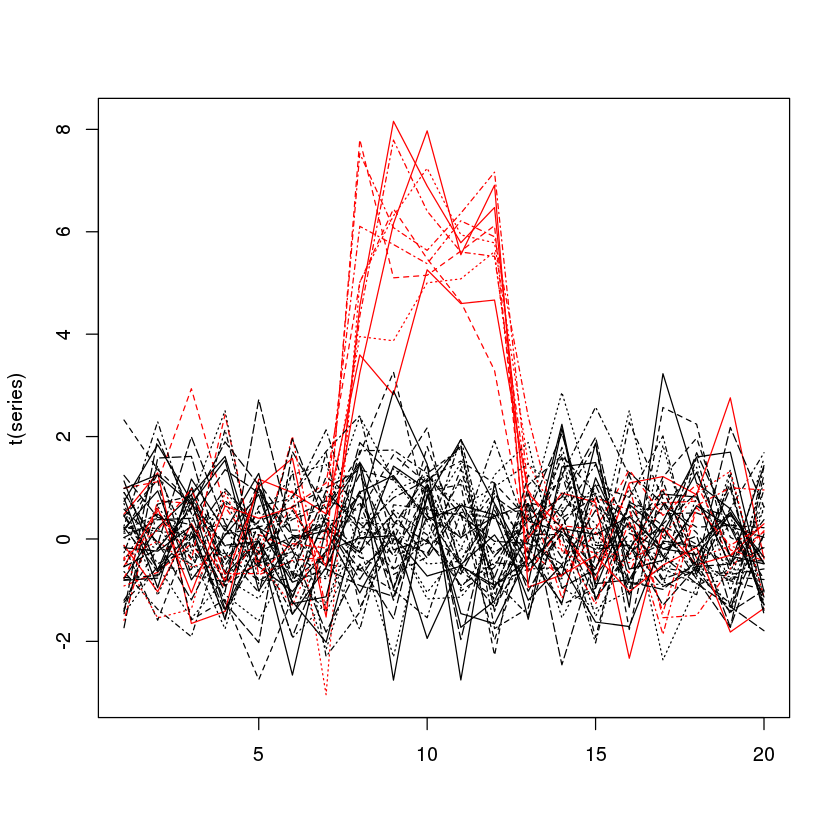

In [68]:
matplot(t(series),type="l",col=classSeries+1)

In [69]:
# generating arbitrary lambda2 sequences
lambda2 = exp(seq(-6, 1, length = 10))
print(lambda2)

 [1] 0.002478752 0.005395326 0.011743628 0.025561533 0.055637998 0.121103332
 [7] 0.263597138 0.573753421 1.248848869 2.718281828


In [70]:
# parameters to be tried is lambda1 for L1 penalty
# and lambda2 for L2 (fused lasso penalty).
# fixing lambda1 to 1, I try to find the optimal
# lambda2 value from the sequence lambdas=list(1,lambda2)
lambdas = list(1,lambda2)

# run the logistic regression (binomial family for binary classification problem)
cvFused = cv.lqa(classSeries,series,lambda.candidates = lambdas, intercept = FALSE,
    family=binomial(), penalty.family=fused.lasso,n.fold=10,loss.func = "aic.loss")

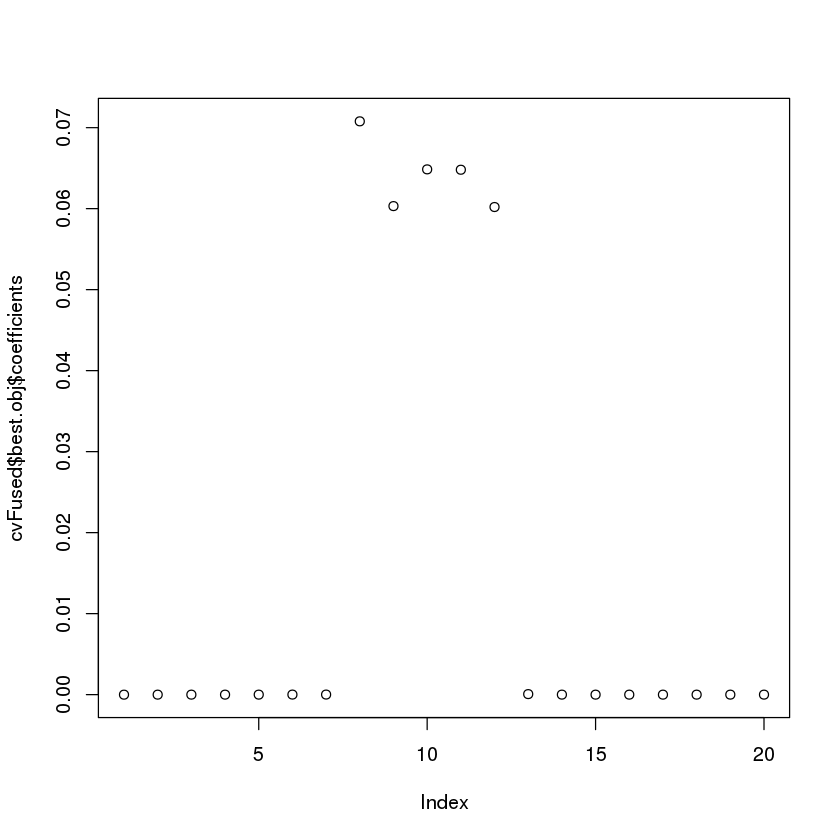

In [71]:
# check the coefficients of the best model
plot(cvFused$best.obj$coefficients)

# glmnet

In [73]:
library(glmnet)

In [181]:
n <- 100
p <- 20000*100
X <- matrix(rnorm(n*p),nrow=n)
b <- matrix(rnorm(p),nrow=p)
b[b<3] <- 0
b[1] <- 1
y <- X %*% b

In [182]:
sort(sapply(ls(), function(x) format(object.size(get(x)), unit = 'auto')))

X          fit       fit.cv            y            b      lambda2 
    "1.5 Gb"    "10.8 Mb"    "10.8 Mb" "1000 bytes"    "15.3 Mb"  "168 bytes" 
     lambdas      cvFused  classSeries    lenseries            n    nofseries 
 "272 bytes"   "333.1 Kb"  "440 bytes"   "48 bytes"   "48 bytes"   "48 bytes" 
           p    sel_begin      sel_end            q         quit       series 
  "48 bytes"   "48 bytes"   "48 bytes"     "7.5 Kb"     "7.5 Kb"       "8 Kb" 
    selected 
  "88 bytes"

In [166]:
fit.cv <- cv.glmnet(X, y, alpha = 0.5, family='gaussian', type.measure = "deviance")

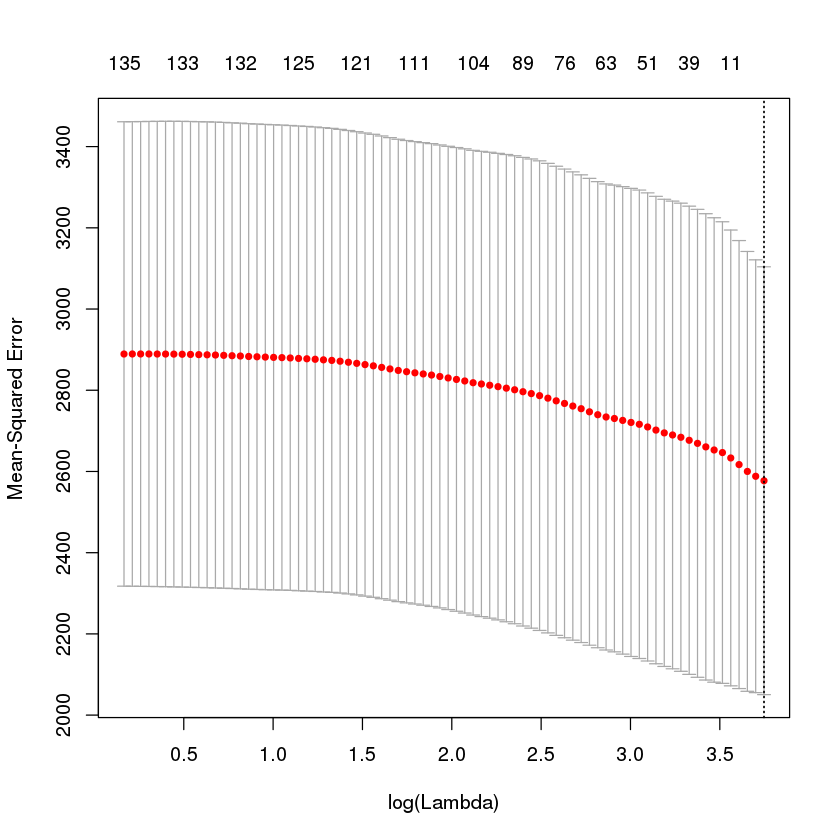

In [167]:
plot(fit.cv)

In [184]:
fit <- glmnet(X,y=y,alpha=0.5)

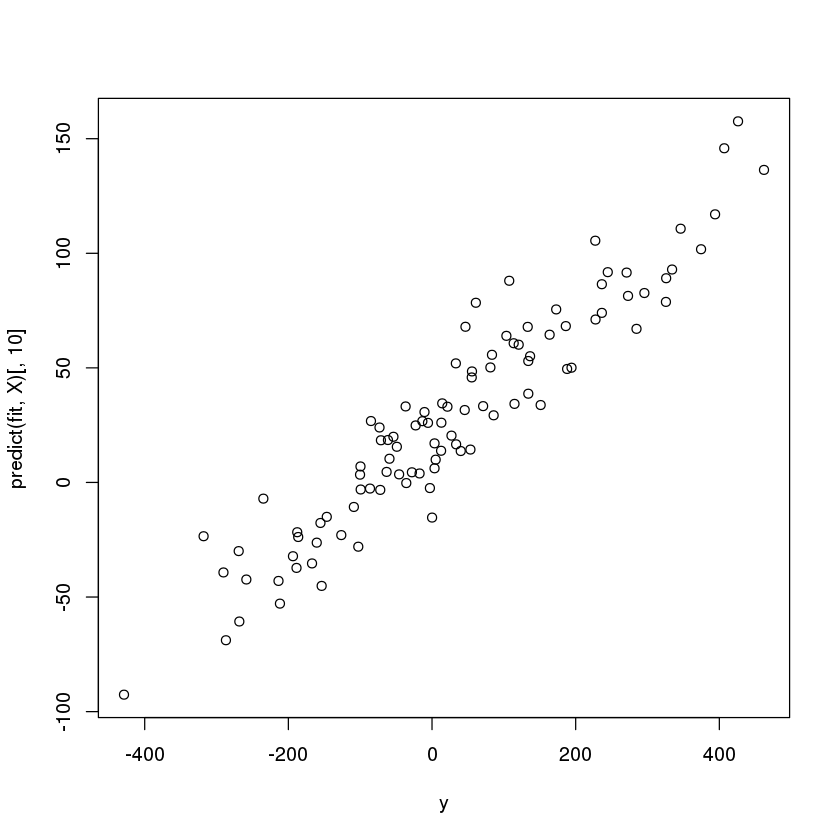

In [185]:
# plot(y, predict(fit,X)[,match(fit.cv$lambda.min, fit$lambda)])
plot(y, predict(fit,X)[,10])